# 장애인콜택시 대기시간 예측
## 단계1.데이터 전처리

## 0.미션

* 1.데이터를 탐색하며 정보 획득
    * 데이터는 2015-01-01 ~ 2022-12-31 까지의 서울 장애인 콜택시 운행 정보입니다. 우리는 평균대기시간을 예측하고자 합니다. 
    * 요일, 월, 계절, 연도별 운행 정보에 어떤 주기와 변화가 있는지 탐색해 봅시다.
* 2.분석을 위한 데이터 구조 만들기
    * 문제정의 : 
        * 전 날 콜택시 운행이 종료되었을 때, 다음 날 대기시간을 예측하고자 합니다.

        * 만약 다음 날 대기시간을 예측할 수 있다면, 일정 범위 내에서 배차를 조절할 수 있을 뿐만 아니라, 향후 교통약자의 이동 편의 증진을 위한 정책 수립 및 개선에 기여할 수 있습니다. 
    * 이를 위한 데이터 구조를 만들어 봅시다.
        * 분석 단위는 일별 데이터 입니다.
        * 주어진 데이터 : 장애인 콜택시 운행 정보, 서울시 날씨
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다. 
            * 예를 들어, 
                * 2020-12-23 의 날씨 데이터는 전 날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
        * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙여서 만듭시다.
        * 휴무일 데이터는 패키지를 통해서 다운받아 사용합니다.
    * Feature Engineering
        * 대기시간에 영향을 주는 요인을 도출하고(가설수립) 이를 feature로 생성합시다.
        * 주어진 그대로의 데이터가 아닌 새로운 feature를 생성해 봅시다.
            * 날짜와 관련된 feature : 요일, 월, 계절 ... 
            * 시계열 특성이 반영된 feature : 최근 7일간의 평균 대기시간 ...




## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

주요 목적지인 의료시설을 방문하기 위해 오전 9시에 장애인 콜택시를 많이 이용함을 의미한다. 
또한 오후 4시에는 집으로 귀가하는 통행이 많은 것으로 나타났는데, 
이는 주요 이동지인 병원에서 집으로 귀가하는 통행인 것으로 미루어 볼 수 있다.
비장애인들의 통행 첨두시간은 주로 출퇴근 시간인 오전 8~9시, 오후 5~7시이기에 
장애인의 첨두시간과 상이한 것을 알 수 있다. 
특징적인 것은 귀가 통행 및 의료시설 등 기타 시설로의 통행 둘 다 오후 12시에 통행량이 현저히 감소한다. 
이는 장애인들의 주요 목적지인 의료시설, 사회복지시설의 휴식시간(점심시간 등)과 관련 있을 것으로 예상한다.

세 모형 결과를 종합하면, 상당수의 저소득 계층 장애인이 콜택시를 이용하나 저소득 가구가 밀집한 지역의 대기시간이 타 지역보다 길어 서비스 불균형이 발생함을 알 수 있다.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [3]:
# !pip install -r requirements.txt

In [5]:
#!pip uninstall scipy

Found existing installation: scipy 1.12.0
Uninstalling scipy-1.12.0:
  Would remove:
    /Users/nacho/opt/anaconda3/lib/python3.9/site-packages/scipy-1.12.0.dist-info/*
    /Users/nacho/opt/anaconda3/lib/python3.9/site-packages/scipy/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


#### 2) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



### (3) 데이터 불러오기
* 주어진 데이터셋
    * 장애인 콜택시 운행 정보 : open_data.csv
    * 날씨 데이터 : weather.csv

In [3]:
pd.set_option("display.max_columns", 150)

#### 1) 데이터로딩

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
taxi_df = pd.read_csv('open_data.csv')

In [6]:
taxi_df.describe()

,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,418.701916,3925.607803,3283.895277,40.305681,2304.272416,9253.500000
std,133.755162,1509.741713,1249.165876,14.098550,107.260080,1019.198152
min,132.000000,527.000000,462.000000,17.200000,2131.000000,7672.000000
25%,278.000000,2162.500000,1779.000000,29.600000,2228.000000,8521.000000
50%,454.000000,4720.500000,3932.500000,38.200000,2257.000000,8821.500000
75%,522.000000,5110.000000,4241.000000,48.600000,2400.750000,10153.000000
max,1413.000000,6182.000000,5189.000000,96.100000,2733.000000,14136.000000


In [137]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
weather_df = pd.read_csv('weather.csv')

In [228]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df.tail(50)

,Date,taxi_count,call,catch,wait_time,cost,dist,week,month,year,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,season,holiday,week_dist_mean,catch_rate
2873,2022-11-12,337,2462,2014,41.8,2417,10121,45,11,2022,17.3,9.1,19.4,97.0,71.0,3.61,Saturday,Fall,0.0,9117.714286,0.818034
2874,2022-11-13,254,1867,1594,35.2,2524,11139,45,11,2022,13.6,6.6,0.0,94.0,49.0,8.25,Sunday,Fall,0.0,9099.571429,0.853776
2875,2022-11-14,641,5754,4875,39.3,2186,8086,46,11,2022,12.1,4.1,1.6,90.0,62.0,6.96,Monday,Fall,0.0,9036.714286,0.847237
2876,2022-11-15,642,5959,4931,45.0,2211,8335,46,11,2022,12.7,5.5,0.0,98.0,37.0,12.11,Tuesday,Fall,0.0,9029.714286,0.827488
2877,2022-11-16,642,5826,4864,45.4,2216,8358,46,11,2022,16.1,5.5,0.0,78.0,43.0,11.46,Wednesday,Fall,0.0,8999.571429,0.834878
2878,2022-11-17,610,5761,4639,42.5,2230,8528,46,11,2022,18.0,5.5,0.0,92.0,41.0,12.08,Thursday,Fall,0.0,8982.142857,0.805242
2879,2022-11-18,616,5589,4604,44.9,2208,8326,46,11,2022,18.9,8.8,0.0,79.0,36.0,11.50,Friday,Fall,0.0,8984.714286,0.823761
2880,2022-11-19,310,2402,1895,50.8,2457,10690,46,11,2022,19.3,9.5,0.0,74.0,39.0,11.85,Saturday,Fall,0.0,9066.000000,0.788926
2881,2022-11-20,237,1978,1579,50.0,2530,11066,46,11,2022,16.1,9.5,0.0,81.0,55.0,6.36,Sunday,Fall,0.0,9055.571429,0.798281
2882,2022-11-21,631,5802,4950,43.9,2210,8290,47,11,2022,13.7,7.2,0.0,92.0,49.0,5.55,Monday,Fall,0.0,9084.714286,0.853154


In [105]:
weather_df.head()

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2012-01-01,0.4,-6.6,0.0,77.0,45.0,4.90
1,2012-01-02,-1.2,-8.3,0.0,80.0,48.0,6.16
2,2012-01-03,-0.4,-6.6,0.4,86.0,45.0,4.46
3,2012-01-04,-4.6,-9.5,0.0,66.0,38.0,8.05
4,2012-01-05,-1.4,-9.6,0.0,71.0,28.0,9.14


#### 2) 기본 정보 조회

In [21]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 전체 데이터의 행,열 개수 확인
taxi_df['기준일'] = pd.to_datetime(taxi_df['기준일'])

In [25]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 전체 데이터의 모든 변수 확인
taxi_df['day'] = taxi_df['기준일'].dt.dayofweek # Monday=0
taxi_df.head()

,기준일,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,day
0,2015-01-01,213,1023,924,23.2,2427,10764,3
1,2015-01-02,420,3158,2839,17.2,2216,8611,4
2,2015-01-03,209,1648,1514,26.2,2377,10198,5
3,2015-01-04,196,1646,1526,24.5,2431,10955,6
4,2015-01-05,421,4250,3730,26.2,2214,8663,0


#### 3) 칼럼이름을 영어로 변경
* 꼭 필요한 작업은 아니지만, 데이터를 편리하게 다루고 차트에서 불필요한 경고메시지를 띄우지 않게 하기 위해 영문으로 변경하기를 권장합니다.


In [66]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

taxi_df.columns=['Date','taxi_count','call','catch','wait_time','cost','dist','day']
taxi_df.head()

,Date,taxi_count,call,catch,wait_time,cost,dist,day
0,2015-01-01,213,1023,924,23.2,2427,10764,3
1,2015-01-02,420,3158,2839,17.2,2216,8611,4
2,2015-01-03,209,1648,1514,26.2,2377,10198,5
3,2015-01-04,196,1646,1526,24.5,2431,10955,6
4,2015-01-05,421,4250,3730,26.2,2214,8663,0


## 2.데이터 기본 탐색

* **세부요구사항**
    * 날짜 요소에 따라 각 정보의 패턴을 조회 합니다.
        * 일별, 요일별, 주차별, 월별, 연도별
        * 접수건, 탑승건, 거리, 요금, 대기시간 등
    * 제시된 범위 외에 가능하다면 추가 탐색을 시도합니다.

### (1) 주기별 분석을 위해서 날짜 변수 추가하기
* data를 복사합니다.
* 복사한 df에 요일, 주차, 월, 연도 등을 추가합니다.

In [67]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = taxi_df.copy()
data['week'] = data['Date'].dt.isocalendar().week
data.head()

,Date,taxi_count,call,catch,wait_time,cost,dist,day,week
0,2015-01-01,213,1023,924,23.2,2427,10764,3,1
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,2


In [194]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['month'] = data['Date'].dt.month
data.tail()


,Date,taxi_count,call,catch,wait_time,cost,dist,day,week,month,year
2917,2022-12-27,669,5635,4654,44.4,2198,8178,1,52,12,2022
2918,2022-12-28,607,5654,4648,44.8,2161,7882,2,52,12,2022
2919,2022-12-29,581,5250,4247,52.5,2229,8433,3,52,12,2022
2920,2022-12-30,600,5293,4200,38.3,2183,8155,4,52,12,2022
2921,2022-12-31,263,2167,1806,33.7,2318,9435,5,52,12,2022


In [69]:
data['year'] = data['Date'].dt.year
data.head()

,Date,taxi_count,call,catch,wait_time,cost,dist,day,week,month,year
0,2015-01-01,213,1023,924,23.2,2427,10764,3,1,1,2015
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,2015
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,2015
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,2015
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,2,1,2015


### (2) 일별

* 차량 운행수

In [74]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.groupby('day')[['taxi_count']].sum()


,taxi_count
day,
0,202251
1,206447
2,202131
3,206525
4,202775
5,109590
6,93728


In [75]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.groupby('day')[['call','catch']].sum()



,call,catch
day,,
0,1966172,1651838
1,2001969,1679172
2,1976302,1650059
3,1989963,1662888
4,1961284,1620747
5,864876,708025
6,710060,622813


* 접수건, 탑승건

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



* 대기시간

In [78]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.groupby('day')[['wait_time']].mean()


,wait_time
day,
0,39.243165
1,40.826139
2,41.676259
3,41.043780
4,40.956459
5,43.480144
6,34.902878


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



* 운임

In [79]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.groupby('day')[['cost']].mean()


,cost
day,
0,2240.059952
1,2242.805755
2,2250.422062
3,2256.366029
4,2246.023923
5,2429.641148
6,2464.541966


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



* 이동거리

In [82]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.groupby('day')[['dist']].mean()


,dist
day,
0,8656.577938
1,8672.112710
2,8752.038369
3,8786.901914
4,8733.665072
5,10431.468900
6,10741.275779


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



### (3) 요일별

* 차량 운행수

In [83]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


data.groupby('day')[['dist']].mean()
data.groupby('day')[['cost']].mean()
data.groupby('day')[['wait_time']].mean()
data.groupby('day')[['call','catch']].sum()
data.groupby('day')[['taxi_count']].sum()

,taxi_count
day,
0,202251
1,206447
2,202131
3,206525
4,202775
5,109590
6,93728


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



* 접수건, 탑승건

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



* 대기시간

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



* 운임

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



* 이동거리

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



### (4) 월별

* 차량 운행수

<AxesSubplot:xlabel='month', ylabel='dist'>

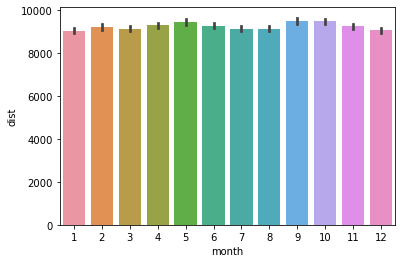

In [158]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


data.groupby('month',as_index=False)[['dist']].mean()
sns.barplot(x = 'month' ,y = 'dist', data = data)

<AxesSubplot:xlabel='month', ylabel='cost'>

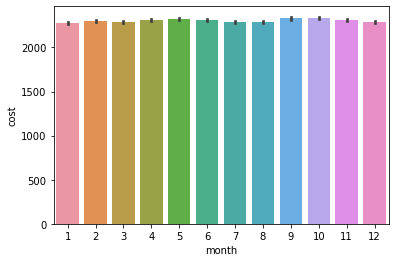

In [159]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.groupby('month',as_index=False)[['cost']].mean()
sns.barplot(x = 'month' ,y = 'cost', data = data)

* 접수건, 탑승건

<AxesSubplot:xlabel='month', ylabel='wait_time'>

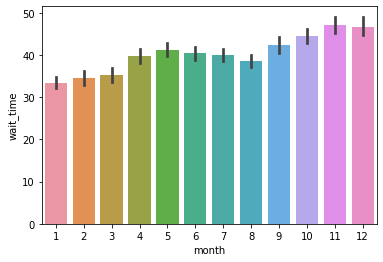

In [160]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.groupby('month',as_index=False)[['wait_time']].mean()
sns.barplot(x = 'month' ,y = 'wait_time', data = data)

<AxesSubplot:xlabel='month', ylabel='catch'>

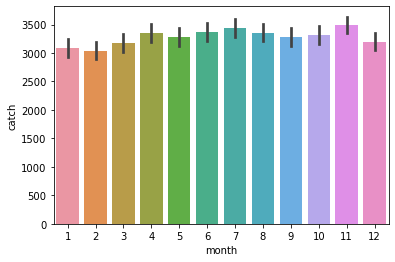

In [161]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.groupby('month',as_index=False)[['catch']].mean()
sns.barplot(x = 'month' ,y = 'catch', data = data)


* 대기시간

<AxesSubplot:xlabel='month', ylabel='taxi_count'>

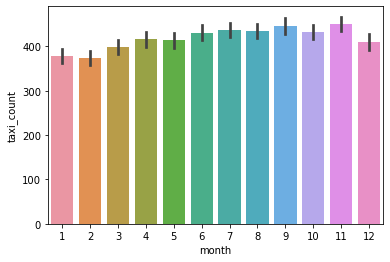

In [162]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.groupby('month',as_index=False)[['taxi_count']].mean()
sns.barplot(x = 'month' ,y = 'taxi_count', data = data)


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



* 운임

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



* 이동거리

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



### (5) 연도별

* 차량 운행수

<AxesSubplot:xlabel='year', ylabel='taxi_count'>

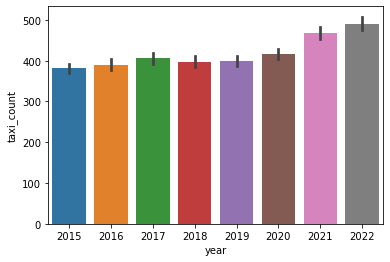

In [163]:


data.groupby('year',as_index=False)[['taxi_count']].mean()
sns.barplot(x = 'year' ,y = 'taxi_count', data = data)


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



* 접수건, 탑승건

<AxesSubplot:xlabel='year', ylabel='catch'>

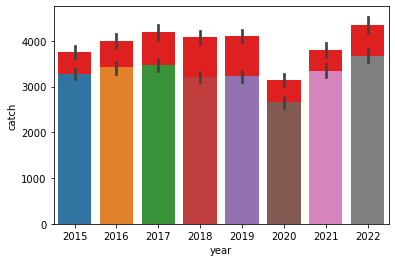

In [170]:

data.groupby('year',as_index=False)[['call','catch']].mean()
sns.barplot(x = 'year' ,y = 'call', data = data, color = 'red')
sns.barplot(x = 'year' ,y = 'catch', data = data)


<AxesSubplot:xlabel='year', ylabel='wait_time'>

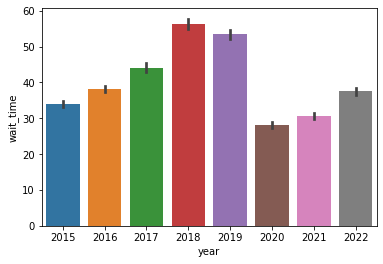

In [171]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data.groupby('year',as_index=False)[['wait_time']].mean()
sns.barplot(x = 'year' ,y = 'wait_time', data = data)

<AxesSubplot:xlabel='year', ylabel='dist'>

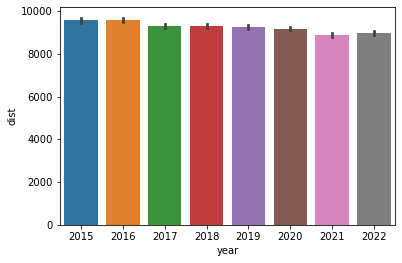

In [172]:

data.groupby('year',as_index=False)[['dist']].mean()
sns.barplot(x = 'year' ,y = 'dist', data = data)

/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

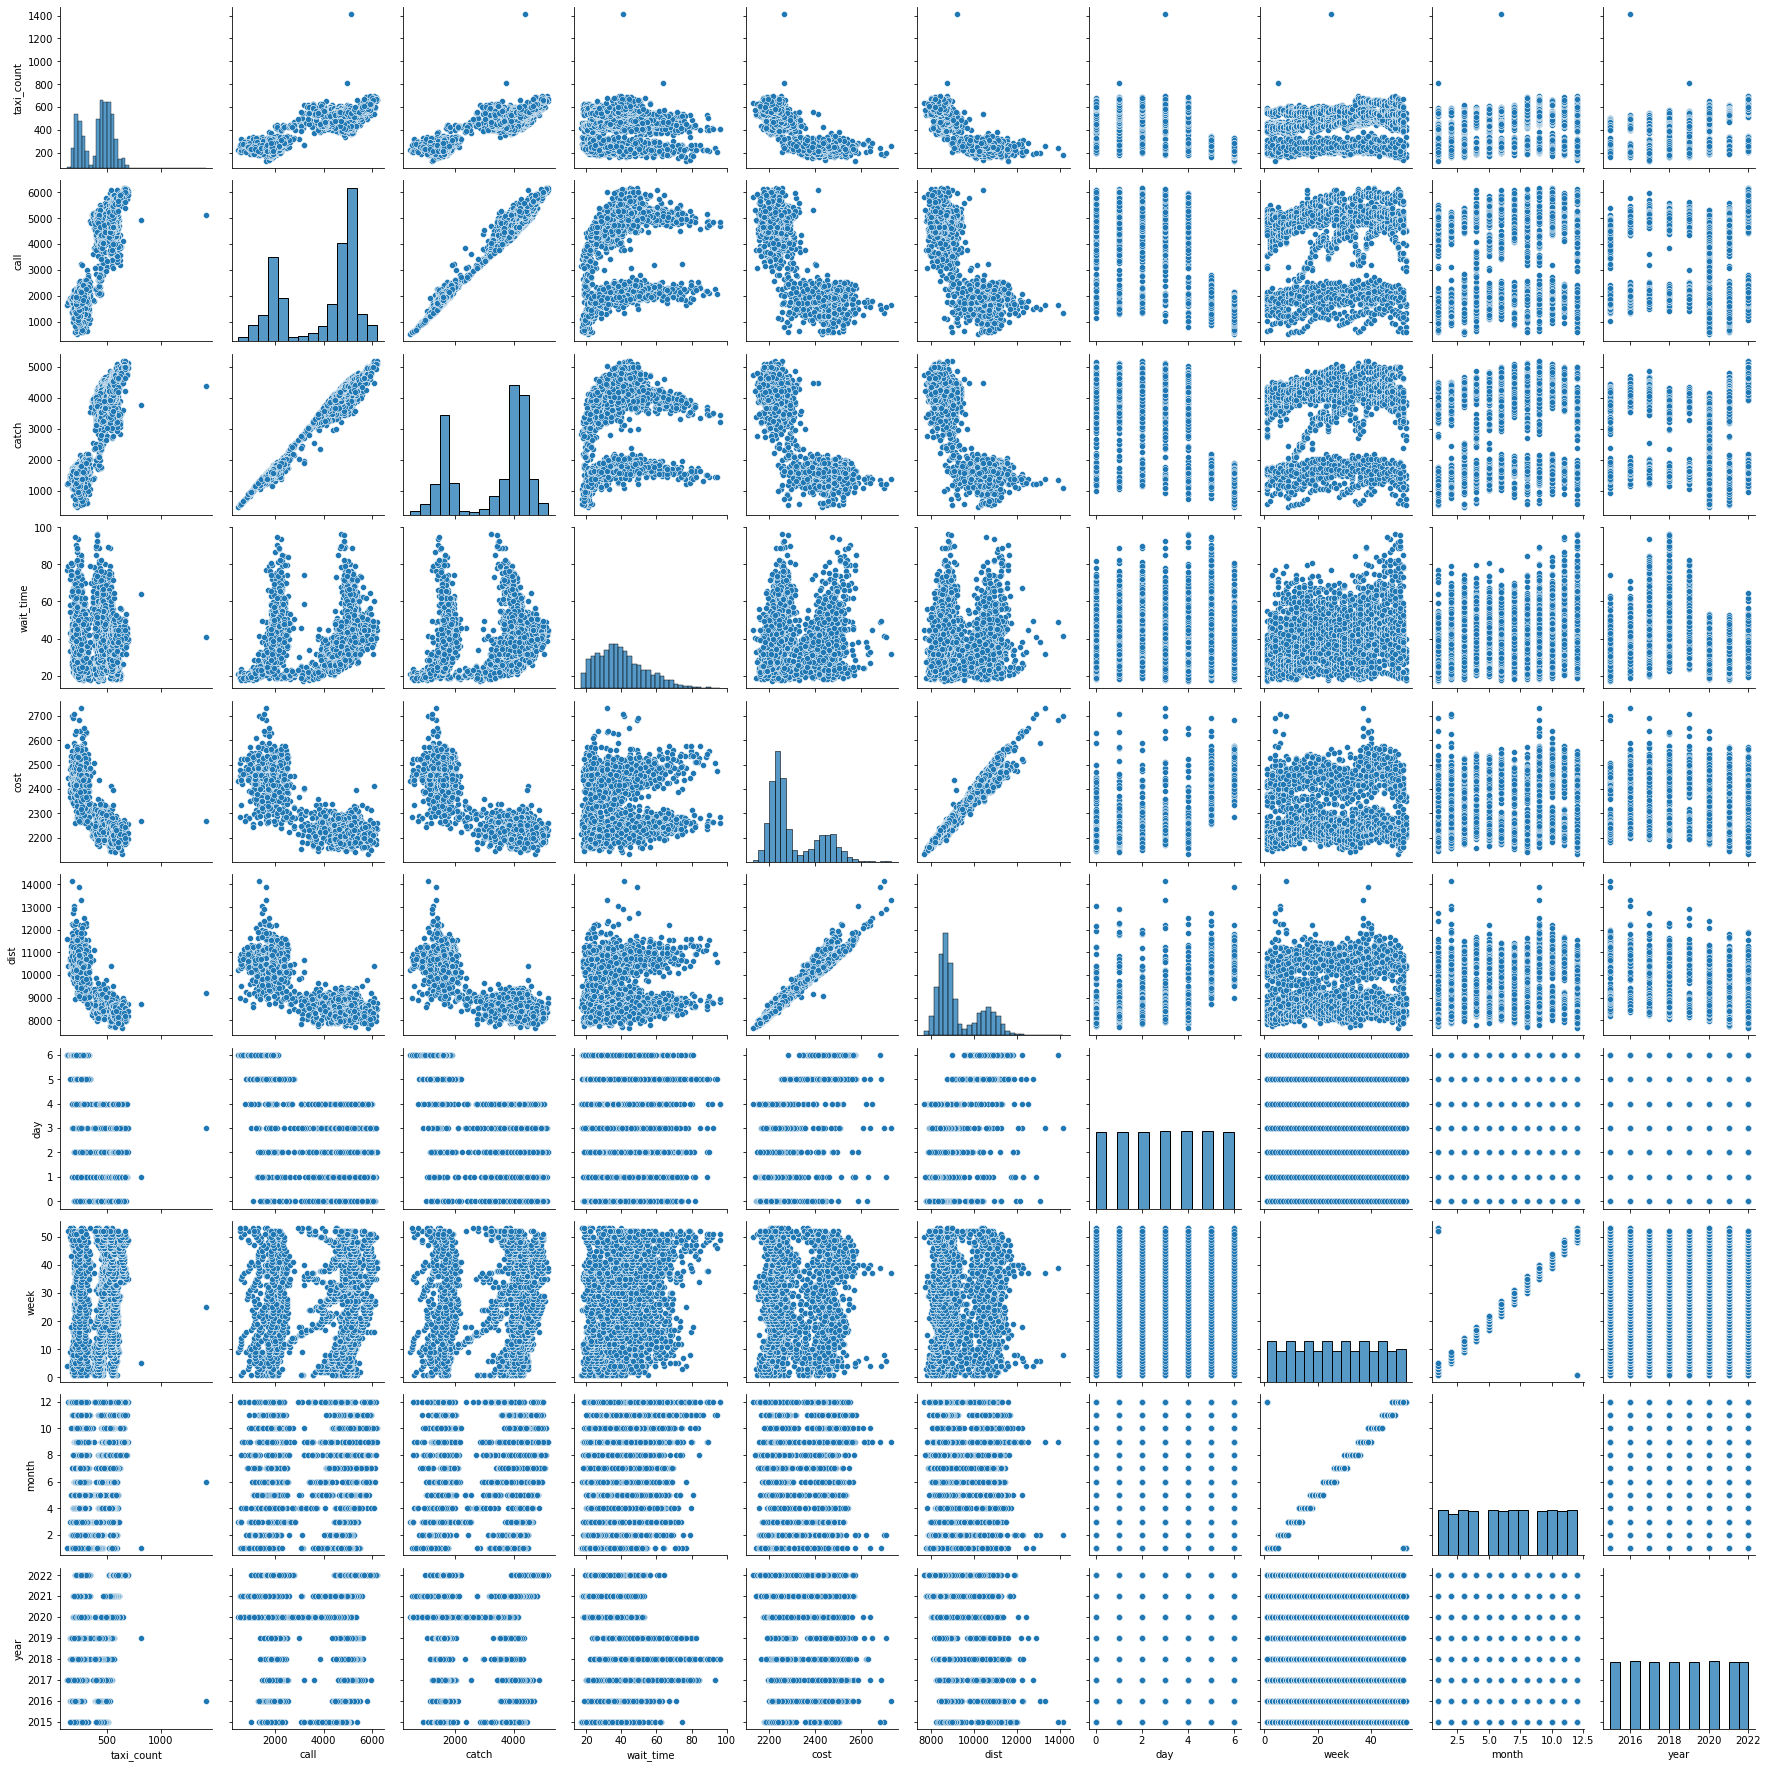

In [190]:
sns.pairplot(data)

In [213]:
df.groupby('taxi_count',as_index=False)[['call','catch']].mean()

,taxi_count,call,catch
0,132,1654.0,1203.0
1,139,1780.0,1244.0
2,157,1895.0,1391.0
3,161,1928.0,1457.0
4,163,1696.0,1490.0
...,...,...,...
472,692,5985.0,4990.0
473,697,5899.0,4956.0
474,700,6051.0,5129.0
475,814,4943.0,3758.0


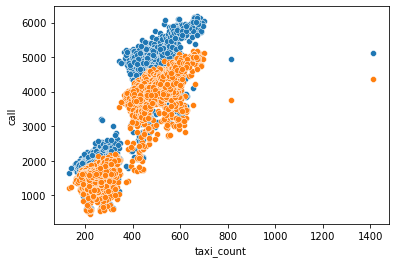

In [221]:
sns.scatterplot(x='taxi_count',y='call', data=df)
sns.scatterplot(x='taxi_count',y='catch', data=df)

plt.show()

/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='catch', ylabel='Count'>

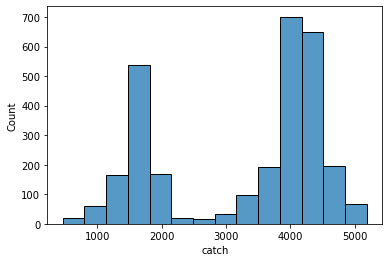

In [193]:
sns.histplot(data['catch'])

## 3.데이터 구조 만들기

* **세부요구사항**
    * 조건 : 
        * 목표 : 전날 저녁, 다음날 평균 대기시간을 예측하고자 합니다.
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다. 
            * 예를 들어, 
                * 2020-12-23 의 날씨 데이터는 전날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
    * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙입니다.

In [204]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
#weather_df = weather_df.shift(-1)

#weather_df.set_index('Date',inplace=True)
weather_df

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2012-01-01,-1.2,-8.3,0.0,80.0,48.0,6.16
1,2012-01-02,-0.4,-6.6,0.4,86.0,45.0,4.46
2,2012-01-03,-4.6,-9.5,0.0,66.0,38.0,8.05
3,2012-01-04,-1.4,-9.6,0.0,71.0,28.0,9.14
4,2012-01-05,1.3,-4.8,0.0,55.0,27.0,8.57
...,...,...,...,...,...,...,...
4013,2022-12-27,-0.3,-5.4,0.1,92.0,40.0,10.86
4014,2022-12-28,1.7,-7.8,0.0,71.0,34.0,10.88
4015,2022-12-29,2.1,-4.0,0.0,87.0,38.0,10.84
4016,2022-12-30,-4.4,-4.4,0.0,66.0,66.0,0.00


In [147]:
#weather_df = weather_df.shift(-1)
weather_df.reset_index(inplace=True)


In [152]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

### (1) target 만들기
* 예측하는 날짜, 대기시간(target)으로 기준을 잡습니다.

In [148]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 익일의 대기시간(waiting time)을 오늘의 데이터를 활용하여 예측 해야하는 대상(target)으로 설정
target = 'wait_time'


### (2) 날씨 데이터 붙이기
* merge를 활용합니다. 기준은 운행정보 입니다.

In [153]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 익일의 실제 날씨 데이터를 전일에 발표된 예보데이터로 판단
df = pd.merge(data,weather_df,on='Date')

In [154]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df


,Date,taxi_count,call,catch,wait_time,cost,dist,day,week,month,year,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2015-01-01,213,1023,924,23.2,2427,10764,3,1,1,2015,-2.0,-8.9,0.0,63.0,28.0,9.07
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,2015,2.4,-9.2,0.0,73.0,37.0,8.66
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,2015,8.2,0.2,0.0,89.0,58.0,5.32
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,2015,7.9,-0.9,0.0,95.0,52.0,6.48
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,2,1,2015,4.1,-7.4,3.4,98.0,29.0,10.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-27,669,5635,4654,44.4,2198,8178,1,52,12,2022,-0.3,-5.4,0.1,92.0,40.0,10.86
2918,2022-12-28,607,5654,4648,44.8,2161,7882,2,52,12,2022,1.7,-7.8,0.0,71.0,34.0,10.88
2919,2022-12-29,581,5250,4247,52.5,2229,8433,3,52,12,2022,2.1,-4.0,0.0,87.0,38.0,10.84
2920,2022-12-30,600,5293,4200,38.3,2183,8155,4,52,12,2022,-4.4,-4.4,0.0,66.0,66.0,0.00


### (3) 새로운 feature를 생성해 봅시다.
* 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 그외 새로운 feature 도출 : 최소 2개 이상
    * 예 : 공휴일, 최근 7주일간의 평균 대기시간, 탑승률 등

In [206]:
df = df.ffill()
df

,Date,taxi_count,call,catch,wait_time,cost,dist,week,month,year,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,season,holiday,week_dist_mean,catch_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,1,1,2015,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,Winter,1.0,10764.000000,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,1,1,2015,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,Winter,0.0,9687.500000,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,1,1,2015,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,Winter,0.0,9857.666667,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,1,1,2015,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,Winter,0.0,10132.000000,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,2,1,2015,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,Winter,0.0,9838.200000,0.877647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2022-12-27,669,5635,4654,44.4,2198,8178,52,12,2022,-0.3,-5.4,0.1,92.0,40.0,10.86,Tuesday,Winter,0.0,8567.285714,0.825909
2919,2022-12-28,607,5654,4648,44.8,2161,7882,52,12,2022,1.7,-7.8,0.0,71.0,34.0,10.88,Wednesday,Winter,0.0,8574.428571,0.822073
2920,2022-12-29,581,5250,4247,52.5,2229,8433,52,12,2022,2.1,-4.0,0.0,87.0,38.0,10.84,Thursday,Winter,0.0,8629.000000,0.808952
2921,2022-12-30,600,5293,4200,38.3,2183,8155,52,12,2022,-4.4,-4.4,0.0,66.0,66.0,0.00,Friday,Winter,0.0,8650.714286,0.793501


#### 1) 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 요일 이름, 계절이름, 월 이름으로 만드는 경우에는, 변수를 pd.Categorical로 범주형을 만들면서 순서를 지정하는 것이 이후 그래프를 그릴 때 순서대로 표현할 수 있습니다.


In [174]:
df['weekday'] = df['Date'].dt.day_name()
df['weekday'] = pd.Categorical(df['weekday'], 
                                  categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df['month'] = df['Date'].dt.month

df['season'] = np.where(df['month'].isin([3,4,5]), 'Spring',
                           np.where(df['month'].isin([6,7,8]), 'Summer',
                                    np.where(df['month'].isin([9,10,11]), 'Fall', 'Winter')))
df['season'] = pd.Categorical(df['season'], categories=['Spring','Summer','Fall','Winter'])
                                     
df['year'] = df['Date'].dt.year
df

,Date,taxi_count,call,catch,wait_time,cost,dist,day,week,month,year,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,season
0,2015-01-01,213,1023,924,23.2,2427,10764,3,1,1,2015,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,Winter
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,2015,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,Winter
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,2015,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,Winter
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,2015,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,Winter
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,2,1,2015,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-27,669,5635,4654,44.4,2198,8178,1,52,12,2022,-0.3,-5.4,0.1,92.0,40.0,10.86,Tuesday,Winter
2918,2022-12-28,607,5654,4648,44.8,2161,7882,2,52,12,2022,1.7,-7.8,0.0,71.0,34.0,10.88,Wednesday,Winter
2919,2022-12-29,581,5250,4247,52.5,2229,8433,3,52,12,2022,2.1,-4.0,0.0,87.0,38.0,10.84,Thursday,Winter
2920,2022-12-30,600,5293,4200,38.3,2183,8155,4,52,12,2022,-4.4,-4.4,0.0,66.0,66.0,0.00,Friday,Winter


#### 2) 공휴일 정보
* workalendar 패키지를 설치하고, 대한민국 공휴일 정보를 끌어와 봅시다.

* 휴무일 데이터 패키지 설치

In [175]:
# !pip install workalendar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:01:010m
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 2.5 MB/s eta 0:00:004.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.1 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=8e8e3e80acf145a6d1772c0094857290ca035ddd9838cbee93fff774cfe91cb9
  Stored in directory: /Users/nacho/Library/Caches/pip/wheels/04/1f/e5/8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built pymeeus
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


* 간단 사용법

In [180]:
from workalendar.asia import SouthKorea
cal = SouthKorea()
pd.DataFrame(cal.holidays(2023)).head() # 대체공휴일 1뭘 24일

,0,1
0,2023-01-01,New year
1,2023-01-21,Korean New Year's Day
2,2023-01-22,Korean New Year's Day
3,2023-01-23,Korean New Year's Day
4,2023-03-01,Independence Day


In [179]:
cal = SouthKorea()
pd.DataFrame(cal.holidays(2022)).head()
# 대통령 선거 3월 9일
# 지방 선거 6월 1일
# 대체공휴일 9월 12일
# 한글날 대체공휴일 10월 10일

,0,1
0,2022-01-01,New year
1,2022-01-31,Korean New Year's Day
2,2022-02-01,Korean New Year's Day
3,2022-02-02,Korean New Year's Day
4,2022-03-01,Independence Day


In [183]:
cal = SouthKorea()
pd.DataFrame(cal.holidays(2021)).head() #8.16, 10.4, 10.11

,0,1
0,2021-01-01,New year
1,2021-02-11,Korean New Year's Day
2,2021-02-12,Korean New Year's Day
3,2021-02-13,Korean New Year's Day
4,2021-03-01,Independence Day


* 휴무일 데이터셋 만들기 2015 ~ 2022
* 실제로 휴무일에 해당하지만 workalendar 라이브러리에 없는 날짜는 직접 추가해봅시다.
    * 휴무일 장애인 콜택시의 접수건 변화에 대한 특징을 찾아 이를 바탕으로 데이터를 조회하여 찾아볼 수 있음

In [184]:
from workalendar.asia import SouthKorea

cal = SouthKorea()
holiday = pd.DataFrame()
for y in range(2015, 2023) :
    holiday = pd.concat([holiday, pd.DataFrame(cal.holidays(y))], axis = 0)

holiday.columns = ['Date', 'holiday']
holiday['Date'] = pd.to_datetime(holiday['Date'])
holiday['holiday'] = 1
holiday

,Date,holiday
0,2015-01-01,1
1,2015-02-18,1
2,2015-02-19,1
3,2015-02-20,1
4,2015-03-01,1
...,...,...
10,2022-09-10,1
11,2022-09-11,1
12,2022-10-03,1
13,2022-10-09,1


* 기존 데이터에 휴무일 정보 결합하기.
* 휴무일이 아닌 날짜는 0으로 저장하시오.

In [185]:
df = pd.merge(df, holiday, how = 'left')
df = df.fillna({'holiday':0})

#### 3) 7일 이동평균 대기시간
* rolling().mean() 사용

In [187]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df['week_dist_mean'] = df['dist'].rolling(window=7,min_periods=1).mean()
df

,Date,taxi_count,call,catch,wait_time,cost,dist,day,week,month,...,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,season,holiday,week_dist_mean
0,2015-01-01,213,1023,924,23.2,2427,10764,3,1,1,...,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,Winter,1.0,10764.000000
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,...,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,Winter,0.0,9687.500000
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,...,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,Winter,0.0,9857.666667
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,...,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,Winter,0.0,10132.000000
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,2,1,...,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,Winter,0.0,9838.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2022-12-27,669,5635,4654,44.4,2198,8178,1,52,12,...,-0.3,-5.4,0.1,92.0,40.0,10.86,Tuesday,Winter,0.0,8567.285714
2919,2022-12-28,607,5654,4648,44.8,2161,7882,2,52,12,...,1.7,-7.8,0.0,71.0,34.0,10.88,Wednesday,Winter,0.0,8574.428571
2920,2022-12-29,581,5250,4247,52.5,2229,8433,3,52,12,...,2.1,-4.0,0.0,87.0,38.0,10.84,Thursday,Winter,0.0,8629.000000
2921,2022-12-30,600,5293,4200,38.3,2183,8155,4,52,12,...,-4.4,-4.4,0.0,66.0,66.0,0.00,Friday,Winter,0.0,8650.714286


#### 4) 탑승률

In [188]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df['catch_rate'] = df['catch']/df['call']
df

,Date,taxi_count,call,catch,wait_time,cost,dist,day,week,month,...,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,season,holiday,week_dist_mean,catch_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,3,1,1,...,-8.9,0.0,63.0,28.0,9.07,Thursday,Winter,1.0,10764.000000,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,...,-9.2,0.0,73.0,37.0,8.66,Friday,Winter,0.0,9687.500000,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,...,0.2,0.0,89.0,58.0,5.32,Saturday,Winter,0.0,9857.666667,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,...,-0.9,0.0,95.0,52.0,6.48,Sunday,Winter,0.0,10132.000000,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,2,1,...,-7.4,3.4,98.0,29.0,10.47,Monday,Winter,0.0,9838.200000,0.877647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2022-12-27,669,5635,4654,44.4,2198,8178,1,52,12,...,-5.4,0.1,92.0,40.0,10.86,Tuesday,Winter,0.0,8567.285714,0.825909
2919,2022-12-28,607,5654,4648,44.8,2161,7882,2,52,12,...,-7.8,0.0,71.0,34.0,10.88,Wednesday,Winter,0.0,8574.428571,0.822073
2920,2022-12-29,581,5250,4247,52.5,2229,8433,3,52,12,...,-4.0,0.0,87.0,38.0,10.84,Thursday,Winter,0.0,8629.000000,0.808952
2921,2022-12-30,600,5293,4200,38.3,2183,8155,4,52,12,...,-4.4,0.0,66.0,66.0,0.00,Friday,Winter,0.0,8650.714286,0.793501


In [197]:
df

,Date,taxi_count,call,catch,wait_time,cost,dist,day,week,month,year,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,season,holiday,week_dist_mean,catch_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,3,1,1,2015,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,Winter,1.0,10764.000000,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,2015,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,Winter,0.0,9687.500000,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,2015,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,Winter,0.0,9857.666667,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,2015,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,Winter,0.0,10132.000000,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,2,1,2015,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,Winter,0.0,9838.200000,0.877647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2022-12-27,669,5635,4654,44.4,2198,8178,1,52,12,2022,-0.3,-5.4,0.1,92.0,40.0,10.86,Tuesday,Winter,0.0,8567.285714,0.825909
2919,2022-12-28,607,5654,4648,44.8,2161,7882,2,52,12,2022,1.7,-7.8,0.0,71.0,34.0,10.88,Wednesday,Winter,0.0,8574.428571,0.822073
2920,2022-12-29,581,5250,4247,52.5,2229,8433,3,52,12,2022,2.1,-4.0,0.0,87.0,38.0,10.84,Thursday,Winter,0.0,8629.000000,0.808952
2921,2022-12-30,600,5293,4200,38.3,2183,8155,4,52,12,2022,-4.4,-4.4,0.0,66.0,66.0,0.00,Friday,Winter,0.0,8650.714286,0.793501


In [200]:
df

,Date,taxi_count,call,catch,wait_time,cost,dist,week,month,year,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,season,holiday,week_dist_mean,catch_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,1,1,2015,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,Winter,1.0,10764.000000,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,1,1,2015,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,Winter,0.0,9687.500000,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,1,1,2015,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,Winter,0.0,9857.666667,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,1,1,2015,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,Winter,0.0,10132.000000,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,2,1,2015,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,Winter,0.0,9838.200000,0.877647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2022-12-27,669,5635,4654,44.4,2198,8178,52,12,2022,-0.3,-5.4,0.1,92.0,40.0,10.86,Tuesday,Winter,0.0,8567.285714,0.825909
2919,2022-12-28,607,5654,4648,44.8,2161,7882,52,12,2022,1.7,-7.8,0.0,71.0,34.0,10.88,Wednesday,Winter,0.0,8574.428571,0.822073
2920,2022-12-29,581,5250,4247,52.5,2229,8433,52,12,2022,2.1,-4.0,0.0,87.0,38.0,10.84,Thursday,Winter,0.0,8629.000000,0.808952
2921,2022-12-30,600,5293,4200,38.3,2183,8155,52,12,2022,-4.4,-4.4,0.0,66.0,66.0,0.00,Friday,Winter,0.0,8650.714286,0.793501


## 4.데이터 저장
* **세부요구사항**
    * joblib 을 사용하여 작업 경로에 정리한 데이터프레임을 저장합니다.
        * 저장파일이름 : data1.pkl

In [229]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df.ffill()


,Date,taxi_count,call,catch,wait_time,cost,dist,week,month,year,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,season,holiday,week_dist_mean,catch_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,1,1,2015,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,Winter,1.0,10764.000000,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,1,1,2015,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,Winter,0.0,9687.500000,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,1,1,2015,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,Winter,0.0,9857.666667,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,1,1,2015,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,Winter,0.0,10132.000000,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,2,1,2015,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,Winter,0.0,9838.200000,0.877647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2022-12-27,669,5635,4654,44.4,2198,8178,52,12,2022,-0.3,-5.4,0.1,92.0,40.0,10.86,Tuesday,Winter,0.0,8567.285714,0.825909
2919,2022-12-28,607,5654,4648,44.8,2161,7882,52,12,2022,1.7,-7.8,0.0,71.0,34.0,10.88,Wednesday,Winter,0.0,8574.428571,0.822073
2920,2022-12-29,581,5250,4247,52.5,2229,8433,52,12,2022,2.1,-4.0,0.0,87.0,38.0,10.84,Thursday,Winter,0.0,8629.000000,0.808952
2921,2022-12-30,600,5293,4200,38.3,2183,8155,52,12,2022,-4.4,-4.4,0.0,66.0,66.0,0.00,Friday,Winter,0.0,8650.714286,0.793501


In [230]:
joblib.dump(df,'data1.plk')

['data1.plk']